In [76]:
#Data Preparation

import pandas as pd #importing pandas library 
#Loading the data using read_csv and setting sep attribute to '#' and setting the headers as it is not available in the given csv.
data=pd.read_csv("Automobile.csv",sep='#',decimal='.',header=None, names=['Symboling','normalized_losses','make',
                                                                          'fuel_type','aspiration','num_of_doors',
                                                                          'body_style','drive_wheels','engine_location',
                                                                          'wheel_base','length','width','height',
                                                                          'curb_weight','engine_type','num_of_cylinders',
                                                                          'engine_size','fuel_system','bore','stroke',
                                                                          'compression_ratio','horsepower','peak_rpm',
                                                                          'city_mpg','highway_mpg','price'])

#Converting all the string/character types to lower and striping off the extra spaces in them.
data=data.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)

normalized_losses = data['normalized_losses'].dropna(0.0) #Getting all the non 'NaN' values
data['normalized_losses']=data['normalized_losses'].fillna(0) #filling the 'NaN' values with zeros
normalized_losses_mean = normalized_losses.astype(int).mean() #finding mean of normalized losses
data['normalized_losses'] = data['normalized_losses'].replace(0.0,normalized_losses_mean) #Replacing all the 0's with mean
  
x=data[data.Symboling ==4] # to filter out 4's from symboling column
x.Symboling=-1 #symboling 4's rows have similar values to symboling value -1's rows in the original dataset.
data.update(x) #to update the dataset with values of x
data.num_of_doors=data.num_of_doors.fillna(0) #filling all the NaN values with 0.
data = data[data.num_of_doors!=0] #filtering out/ removing all the NaN values

#Based on the observations from the original dataset we are setting the price 
data_subset=data[data['price'] == 0.0]
data_subset=data_subset[data_subset['fuel_type'] == 'diesel'].replace(0.0,22470) # Changing price of car with fuel type diesel
data.update(data_subset) #updating to the dataset
data_subset=data[data['price'] == 0.0]
data_subset=data_subset[data_subset['curb_weight'] == 3062].replace(0.0,22625) # Changing all the zero priced of cars with curb weight 3062 
data.update(data_subset) #updating to the dataset
data.dropna(subset=['price'], inplace=True) #removing all the NaN values prices from the data set.

corrected_makes=data['make'].str.replace("vol00112ov","volvo")# fixing typo's in 'make' column
data['make']=corrected_makes  #updating to the dataset
corrected_aspiration=data['aspiration'].str.replace("turrrrbo","turbo")# fixing typo's in 'aspiration' column
data['aspiration']=corrected_aspiration  #updating to the dataset
corrected_numofdoors=data.num_of_doors.str.replace("fourr","four")# fixing typo's in 'num_of_doors' column
data.num_of_doors=corrected_numofdoors #updating to the dataset

#Used to show all data in the jupyter notebook instead of truncated data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data  #displays the clean data reday for visualization





,Symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3.0,116.863874,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,3.0,116.863874,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,1.0,116.863874,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,2.0,116.863874,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,1.0,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,1.0,116.863874,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,1.0,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,ohc,five,131.0,mpfi,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,2.0,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,four,108.0,mpfi,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


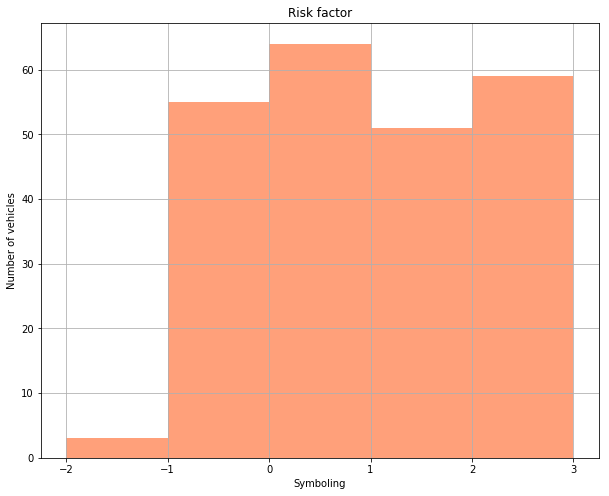

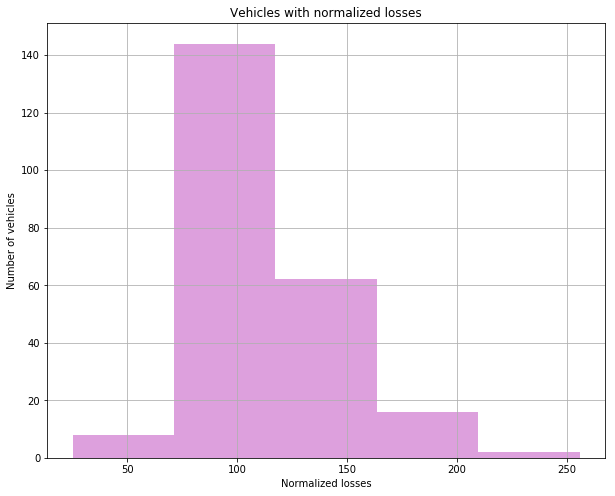

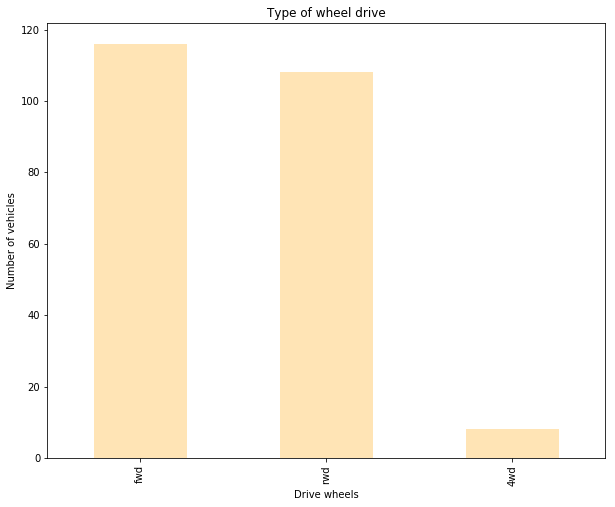

In [78]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Code goes after this line

import matplotlib.pyplot as plt
import seaborn as sns
#Ordinal visualization
data['Symboling'].hist(bins=5,color='lightsalmon') # Histogram showing symboling versus number of vehicles falling under that category
plt.title("Risk factor") #setting title
plt.xlabel('Symboling') #setting x-axis label
plt.ylabel('Number of vehicles') #setting y-axis label
plt.show() #show plot

#Numerical variable visualization
data['normalized_losses'].hist(bins=5,color='plum') # Histogram showing normalized losses versus number of vehicles falling under that category
plt.title("Vehicles with normalized losses")  #setting title
plt.xlabel('Normalized losses')#setting x-axis label
plt.ylabel('Number of vehicles')#setting y-axis label
plt.show() #show plot


#Nominal variable visualization
data['drive_wheels'].value_counts().plot(kind='bar',color='moccasin')# Histogram showing Wheel drive versus number of vehicles falling under that category
plt.title("Type of wheel drive")#setting title
plt.ylabel('Number of vehicles')#setting x-axis label
plt.xlabel('Drive wheels');#setting y-axis label
plt.show() #show plot


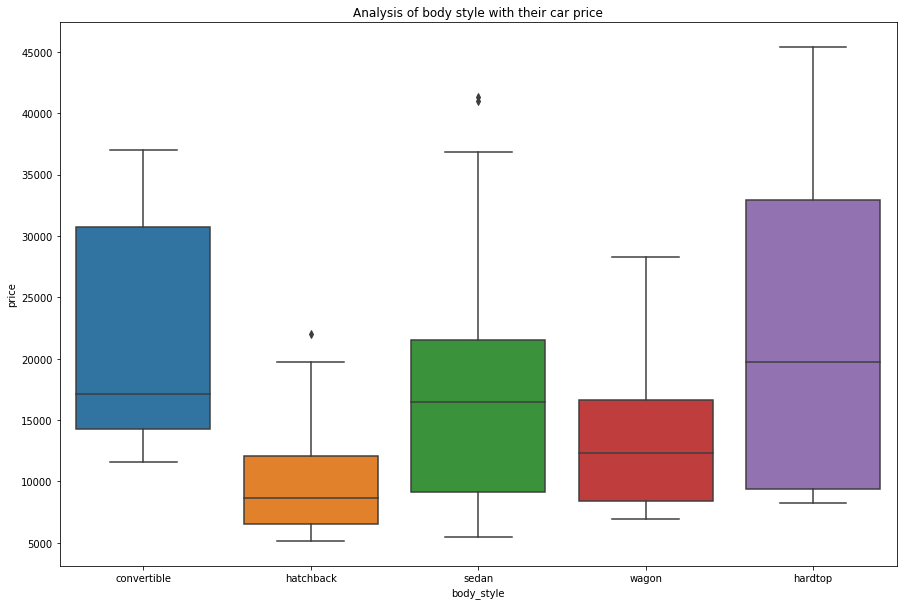

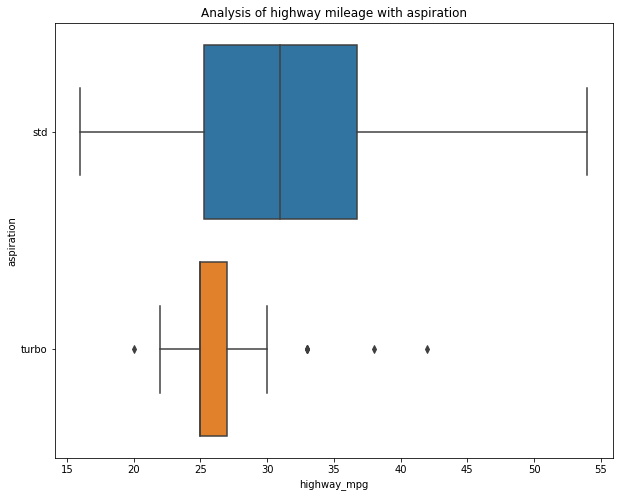

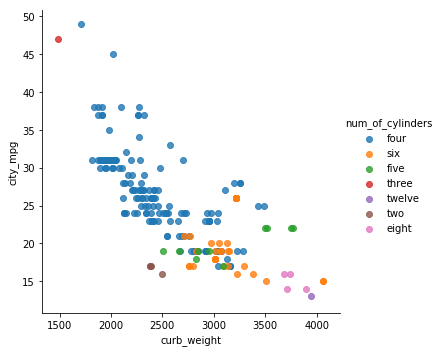

In [79]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line
#1st visualization
plt.rcParams['figure.figsize']=(15,10) #setting the size of the graph
plt.title("Analysis of body style with their car price") #setting title of the graph
sns.boxplot(x="body_style", y="price", data=data) #creating boxplot
plt.show()  #show plot

#2nd Visualization
plt.rcParams['figure.figsize']=(10,8)# setting Figure size
plt.title("Analysis of highway mileage with aspiration")# setting title of the graph
ax = sns.boxplot(x="highway_mpg", y="aspiration", data=data)  # plotting on box plot with aspiration and horsepower column from data.
plt.show()   #show plot

#3rd Visualization
sns.lmplot('curb_weight',"city_mpg", data, hue="num_of_cylinders", fit_reg=False); #creating scatter plot
plt.show()   #show plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002CD9DC88>,
      dtype=object)

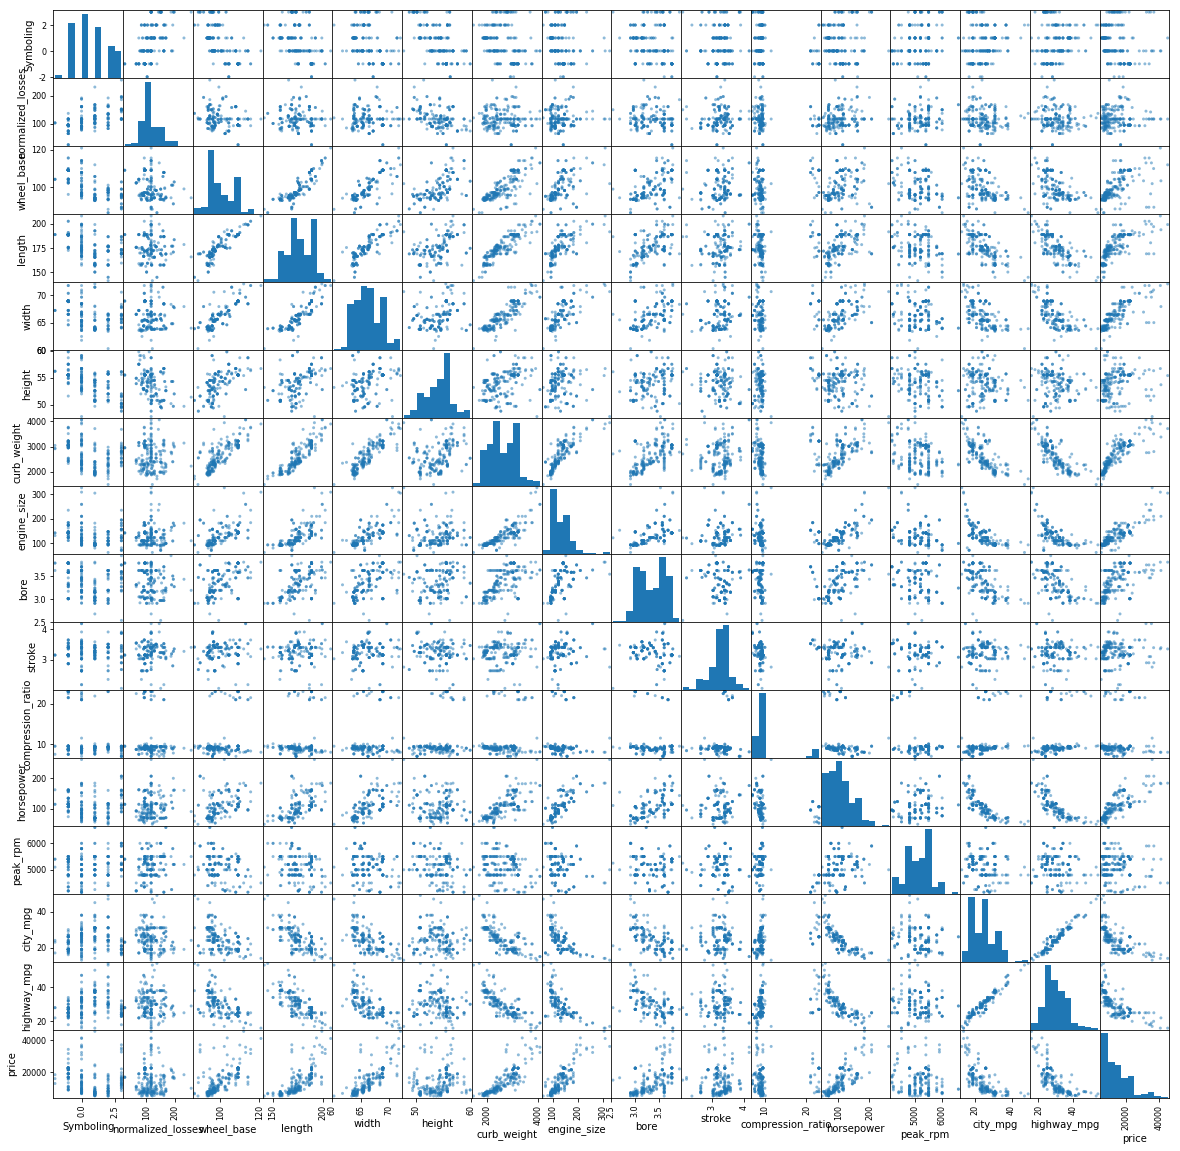

In [51]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line
#Scatter matrix for automobile datset
pd.plotting.scatter_matrix(data[['Symboling','normalized_losses','wheel_base','length','width',
                                 'height','curb_weight','engine_size','bore','stroke','compression_ratio',
                                 'horsepower','peak_rpm','city_mpg','highway_mpg','price']], figsize=(20,20))

